In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import json
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
#Read the csv file into the pandas dataframe
df = pd.read_csv('C:/Users/admin/Downloads/Copper_Set.xlsx - Result 1.csv')

df.tail(5)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [4]:
data=df.copy(True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,181663,181664,181665,181666,181667,181668,181669,181670,181671,181672
id,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,E140FF1B-2407-4C02-A0DD-780A093B1158,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,4E1C4E78-152B-430A-8094-ADD889C9D0AD,FE372230-29B1-4A29-BB73-CB9D3078C286,E1B47219-42C8-411D-AE46-AD5256DC4757,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2851F48B-DA32-4DF3-884B-17A3100DD65A,6E4D638C-A820-4A40-836F-C9D48BC65528,...,08F8F1D6-0DAC-42B5-BA8A-B6C99EF1700B,A33557CD-93EF-4828-8235-E0A576C1A925,F9B79E56-2EBF-417B-9802-7F575D1079F7,C01DE4E8-BC5F-42AD-B35F-8FCBEE34C6ED,0B812591-B501-4F34-859A-B06381FAEB44,DE633116-D1DF-4846-982E-55EFC3658A76,A48374B1-E6DB-45F2-889A-1F9C27C099EB,91643238-5C7B-4237-9A5F-63AE3D35F320,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC
item_date,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,...,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,1203.157826,603.1149396,6.169226263,82.12379422,106.7832992,102.4824216,208.0864686,4.235593568,-2000,406.6865384
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0
country,28.0,25.0,30.0,32.0,28.0,25.0,30.0,32.0,38.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Won,Won,Won,Won,Won,Won
item type,W,W,WI,S,W,W,W,W,S,W,...,W,W,W,W,W,W,W,W,W,W
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,0.72,0.85,0.71,1.18,0.96,0.96,0.95,0.71,0.85,0.71
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1240.0,1240.0,1300.0,1220.0,1240.0,1220.0,1500.0,1250.0,1250.0,1240.0


In [5]:
data.shape

(181673, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
for i in list(data.columns):
    print(f"{i}  \t:  {data[i].nunique()}")

id  	:  181671
item_date  	:  252
quantity tons  	:  181673
customer  	:  1169
country  	:  17
status  	:  9
item type  	:  7
application  	:  30
thickness  	:  594
width  	:  1386
material_ref  	:  16563
product_ref  	:  33
delivery date  	:  28
selling_price  	:  9795


In [9]:
data[data["id"].isna()==True]['id']

26        NaN
104566    NaN
Name: id, dtype: object

In [10]:
data.iloc[26]

id                          NaN
item_date            20210401.0
quantity tons          15.92799
customer             30271717.0
country                    28.0
status           To be approved
item type                     W
application                10.0
thickness                   0.8
width                    1000.0
material_ref                NaN
product_ref              611993
delivery date        20210701.0
selling_price            1208.0
Name: 26, dtype: object

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


PRE-PROCESSING

CONVERTING DATE TIME FORMAT

In [12]:
columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [13]:
data.dtypes

id                object
item_date         object
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [14]:
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y-%m-%d')
data['delivery date']=pd.to_datetime(data['delivery date'],format='%Y-%m-%d')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [15]:
print(data['item_date'].max())
print(data['item_date'].min())

2021-04-01 00:00:00
2020-07-02 00:00:00


In [16]:
print(data["delivery date"].max())
print(data['delivery date'].min())

2022-01-01 00:00:00
2019-04-01 00:00:00


In [17]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons            object
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

CONVERTING NUMERIC VALUES

In [18]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons            object
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [19]:
columns_to_convert_numeric = ["quantity tons", "customer","country", "application", "thickness", "width", "selling_price"]
for i in columns_to_convert_numeric:
  data[i]=pd.to_numeric(data[i],errors='coerce')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [20]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [21]:
data.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

DROP ID COLUMN

In [22]:
data.drop(columns=['id'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


MATERIAL_REF COLUMN


In [23]:
data['material_ref'] = data['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [24]:
data.drop(columns=['material_ref'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


In [25]:
data.isna().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [26]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


CHANGE TH NEGATIVE VALUES IN THE COLUMNS


FILLNA VALUES


WITH MEAN


In [27]:
columns_fill_mean = ["quantity tons" , "thickness", "width", "selling_price"]
column_means = data[columns_fill_mean].mean()
data[columns_fill_mean] = data[columns_fill_mean].fillna(column_means)


WITH MEDIEN


In [28]:
#numerical datatype using median
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['application'].fillna(data['application'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

WITH MODE

In [29]:
# object datatype using mode
data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
data['status'].fillna(data['status'].mode().iloc[0], inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0], inplace=True)

In [30]:
data["country"]=data["country"].astype('int64')

In [31]:
data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [32]:
data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [33]:
data.to_csv('clean_copper_data.csv',index=False)

EDA


TO VISUALIZE OUTLIERS AND SKEWNESS

In [34]:
eda_data=data.copy(True)

In [35]:
eda_data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

Using Boxplot and Distplot


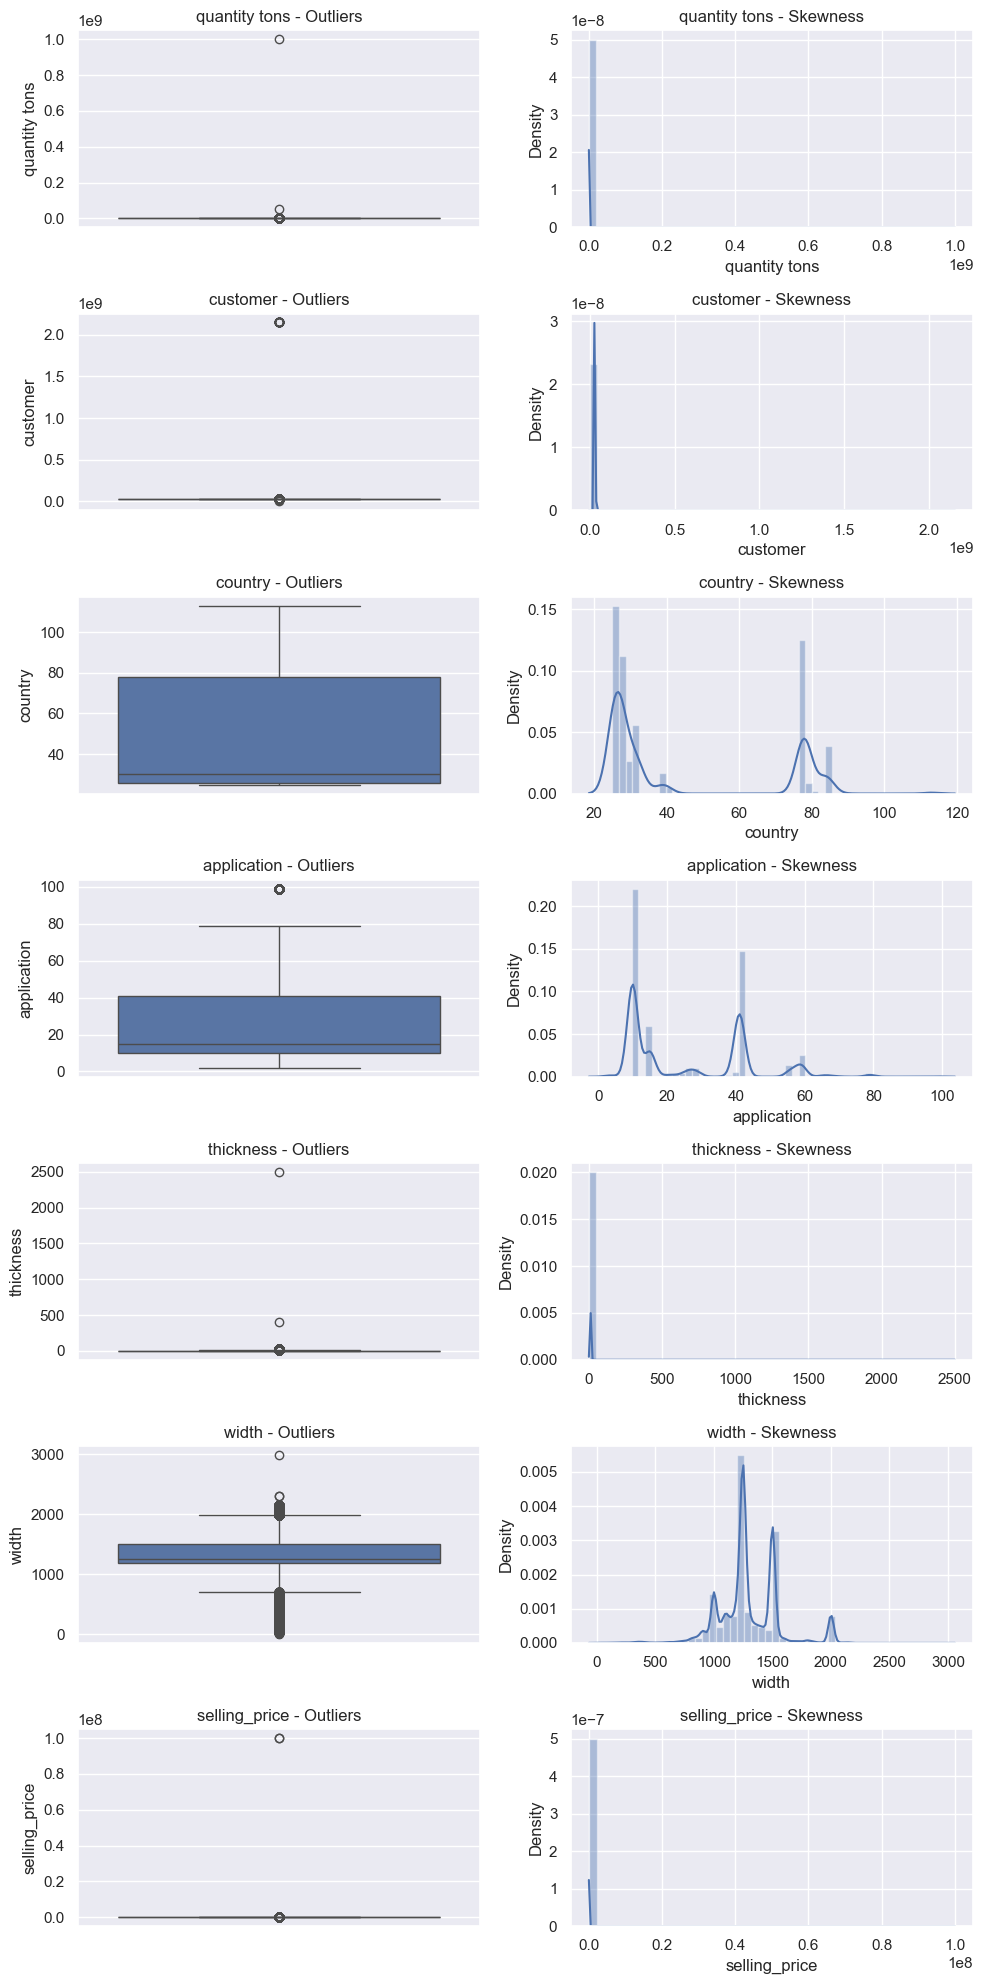

In [36]:
# Create a figure with 6 subplots
fig, axes = plt.subplots(7, 2, figsize=(10,20))

sns.boxplot(ax=axes[0, 0], data=eda_data['quantity tons'])      #quantity tons
axes[0, 0].set_title('quantity tons - Outliers')
sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
axes[0, 1].set_title('quantity tons - Skewness')

sns.boxplot(ax=axes[1, 0], data=eda_data['customer'])          #customer
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=eda_data['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=eda_data['country'])           #country
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=eda_data['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=eda_data['application'])       #application
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=eda_data['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=eda_data['thickness'])        #thickness
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=eda_data['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=eda_data['width'])            #width
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=eda_data['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=eda_data['selling_price'])   #selling_price
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=eda_data['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()
plt.show()

USING VIOLIN PLOT

In [37]:
def plot(eda_data, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=eda_data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

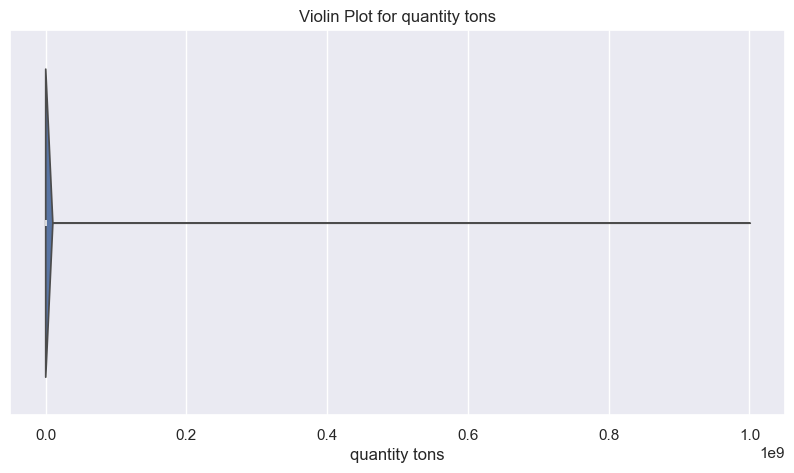

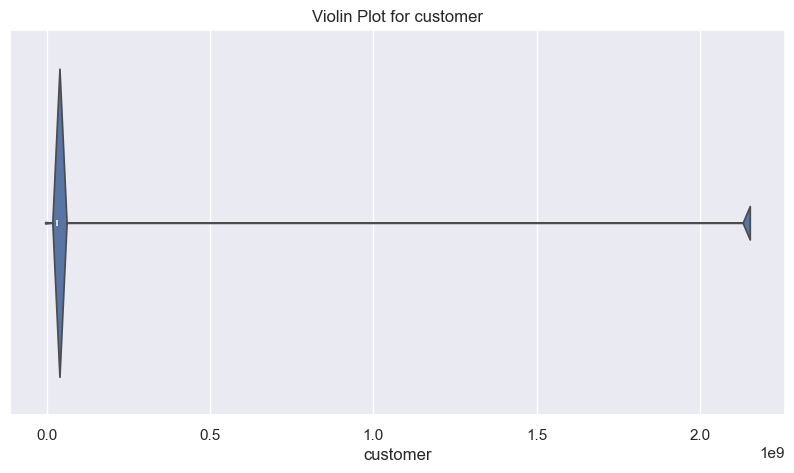

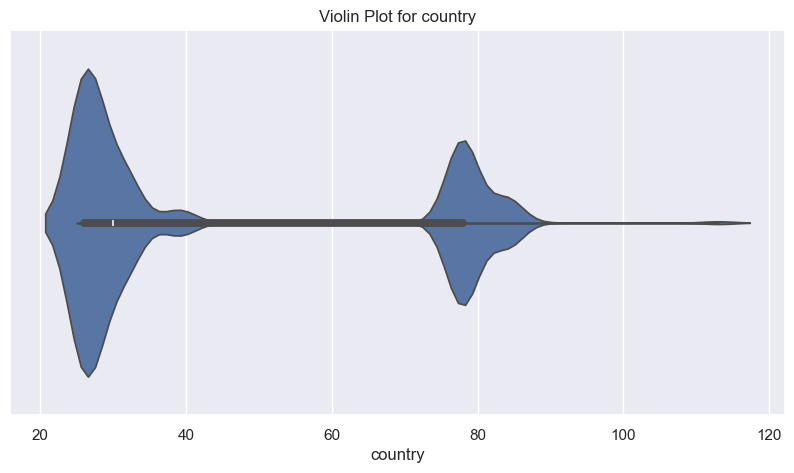

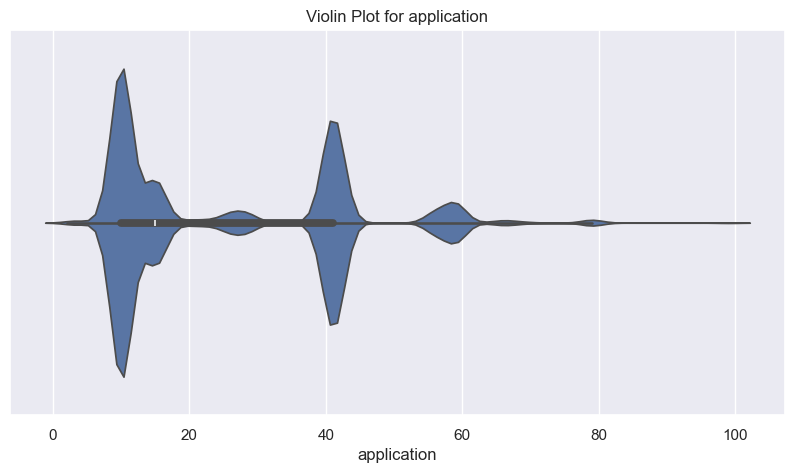

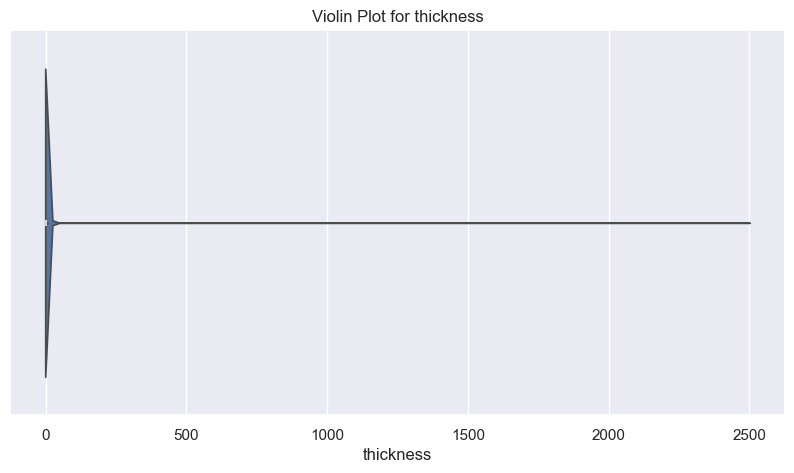

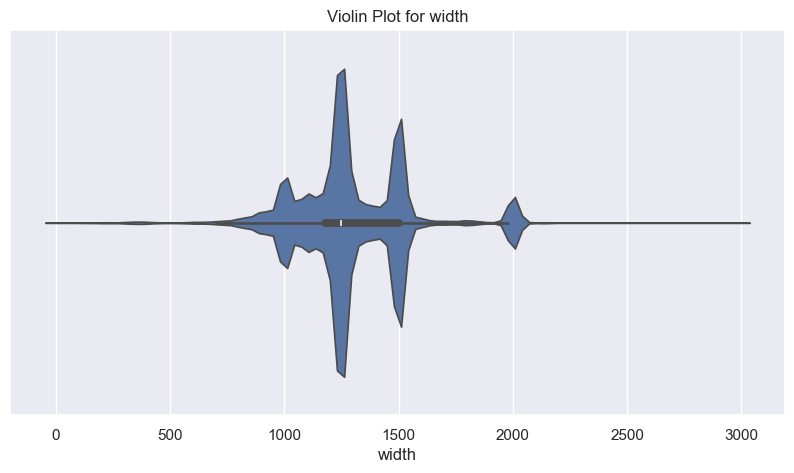

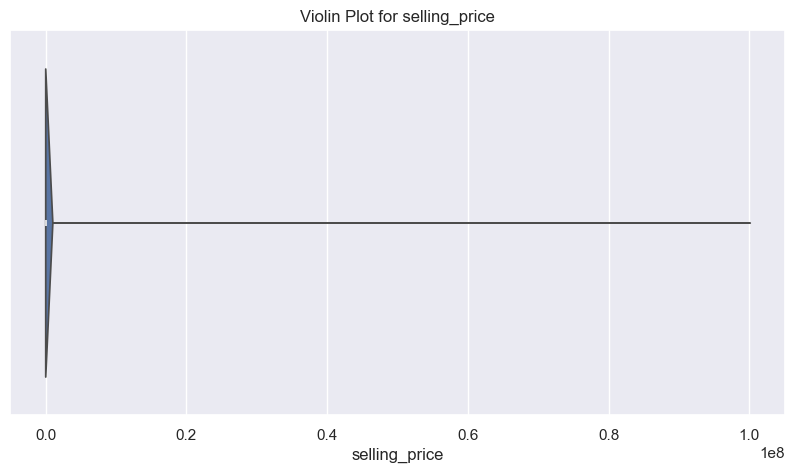

In [38]:
for i in ['quantity tons', 'customer', 'country',  'application', 'thickness', 'width', 'selling_price']:
    plot(eda_data, i)

In [39]:
out_skew_data=eda_data.copy(True)

In [40]:
skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')               
    out_skew_data.loc[neg,column] = np.nan


quantity tons : 4 
thickness : 0 
width : 0 
selling_price : 7 


In [41]:
out_skew_data.isna().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [42]:
out_skew_data.dropna(inplace=True)

In [43]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [44]:
out_skew_data_1=out_skew_data.copy(True)

In [45]:
out_skew_data_1=out_skew_data_1.drop(['item_date','delivery date','status','item type'],axis=1)
# out_skew_data_2=out_skew_data_1.copy(True)

In [46]:
out_skew_data_1.skew()

quantity tons    424.677959
customer          86.982674
country            0.753768
application        0.724624
thickness         15.291371
width              0.374564
product_ref        1.015276
selling_price    301.378964
dtype: float64

In [47]:
print(out_skew_data['item_date'].max())
print(out_skew_data['item_date'].min())
print(out_skew_data["delivery date"].max())
print(out_skew_data['delivery date'].min())

2021-04-01 00:00:00
2020-07-02 00:00:00
2022-01-01 00:00:00
2019-04-01 00:00:00


IQR-Inter Quartile Range

In [48]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_stats = out_skew_data[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = out_skew_data[column].quantile(0.25)
    Q3 = out_skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_skew_data[column] = out_skew_data[column].clip(lower_bound, upper_bound)

# Calculate summary statistics after removing outliers
after_stats = out_skew_data[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816620e+05  181662.000000  181662.000000   1.816620e+05
mean    5.875291e+03       2.551133    1295.289042   1.918156e+03
std     2.349146e+06       2.977116     261.638547   3.318048e+05
min     1.000000e-05       0.180000       1.000000   1.000000e-01
25%     1.097088e+01       0.700000    1180.000000   6.690000e+02
50%     3.036501e+01       1.500000    1250.000000   8.120000e+02
75%     6.716141e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09     400.000000    2990.000000   1.000010e+08

Summary statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count  181662.000000  181662.000000  181662.000000  181662.000000
mean       49.177121       2.245445    1297.048008     819.083929
std        47.994292       1.890698     248.968268     209.131167
min         0.000010       0.180000     700.000000  

AFTER TREATING OUTLIERS AND SKEWNESS


<function matplotlib.pyplot.show(close=None, block=None)>

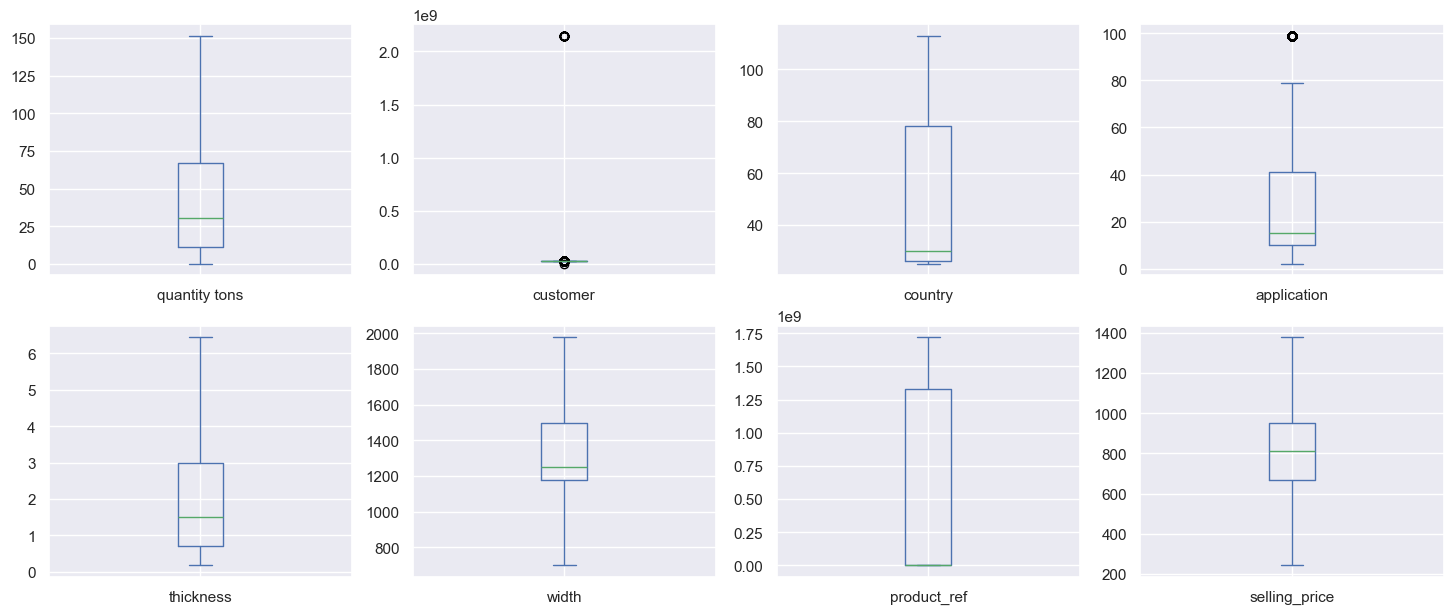

In [49]:
out_skew_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

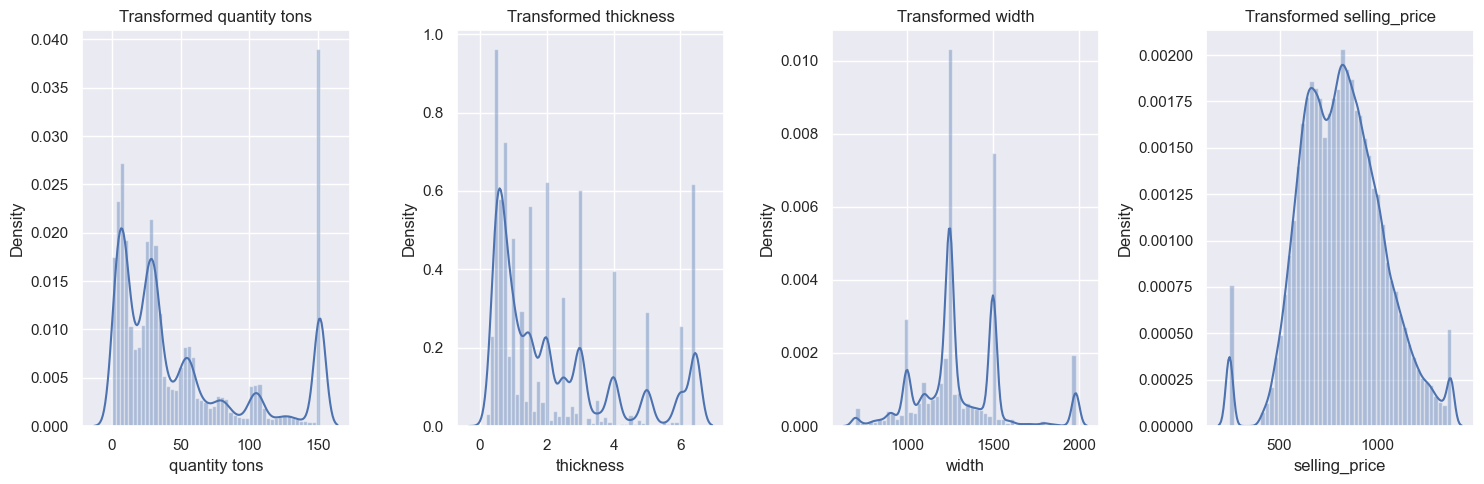

In [50]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

# Plot the histograms of the transformed data
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

In [51]:
out_skew_data_1.skew()

quantity tons    424.677959
customer          86.982674
country            0.753768
application        0.724624
thickness         15.291371
width              0.374564
product_ref        1.015276
selling_price    301.378964
dtype: float64

FEATURE ENGINEERING


In [52]:
model_data=out_skew_data.copy(True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181662 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181662 non-null  datetime64[ns]
 1   quantity tons  181662 non-null  float64       
 2   customer       181662 non-null  float64       
 3   country        181662 non-null  int64         
 4   status         181662 non-null  object        
 5   item type      181662 non-null  object        
 6   application    181662 non-null  float64       
 7   thickness      181662 non-null  float64       
 8   width          181662 non-null  float64       
 9   product_ref    181662 non-null  int64         
 10  delivery date  181662 non-null  datetime64[ns]
 11  selling_price  181662 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 18.0+ MB


In [53]:
model_data['delivery_time_taken']=(model_data['item_date']-model_data['delivery date']).abs().dt.days
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447218,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447218,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.447218,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.447218,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [54]:
x=model_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']]

In [55]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181662 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            181662 non-null  datetime64[ns]
 1   quantity tons        181662 non-null  float64       
 2   customer             181662 non-null  float64       
 3   country              181662 non-null  int64         
 4   status               181662 non-null  object        
 5   item type            181662 non-null  object        
 6   application          181662 non-null  float64       
 7   thickness            181662 non-null  float64       
 8   width                181662 non-null  float64       
 9   product_ref          181662 non-null  int64         
 10  delivery date        181662 non-null  datetime64[ns]
 11  selling_price        181662 non-null  float64       
 12  delivery_time_taken  181662 non-null  int64         
dtypes: datetime64[ns](2

In [56]:
num=model_data.select_dtypes(include=np.number)
num

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28,10.0,2.00,1500.0,1670798778,854.00,91
1,151.447218,30202938.0,25,41.0,0.80,1210.0,1668701718,1047.00,0
2,151.447218,30153963.0,30,28.0,0.38,952.0,628377,644.33,90
3,151.447218,30349574.0,32,59.0,2.30,1317.0,1668701718,768.00,90
4,151.447218,30211560.0,28,10.0,4.00,1980.0,640665,577.00,31
...,...,...,...,...,...,...,...,...,...
181667,106.783299,30200854.0,25,41.0,0.96,1240.0,164141591,602.00,1
181668,102.482422,30200854.0,25,41.0,0.96,1220.0,164141591,591.00,1
181669,151.447218,30200854.0,25,41.0,0.95,1500.0,164141591,589.00,1
181670,4.235594,30200854.0,25,41.0,0.71,1250.0,164141591,619.00,1


Correlation


In [57]:
corrm=num.corr()
corrm

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
quantity tons,1.000000,-0.001917,-0.090032,0.095520,0.002769,0.010398,0.051460,-0.041819,0.067674
customer,-0.001917,1.000000,-0.006669,-0.006869,0.021806,0.009585,-0.007716,-0.026031,-0.001515
country,-0.090032,-0.006669,1.000000,-0.019298,-0.055996,0.053864,-0.147310,-0.021714,-0.240433
application,0.095520,-0.006869,-0.019298,1.000000,-0.163481,-0.198875,-0.131813,0.129890,-0.167831
thickness,0.002769,0.021806,-0.055996,-0.163481,1.000000,0.419077,0.155758,-0.363868,0.084554
width,0.010398,0.009585,0.053864,-0.198875,0.419077,1.000000,-0.024106,-0.173316,0.038787
product_ref,0.051460,-0.007716,-0.147310,-0.131813,0.155758,-0.024106,1.000000,-0.077811,0.161775
selling_price,-0.041819,-0.026031,-0.021714,0.129890,-0.363868,-0.173316,-0.077811,1.000000,0.274230
delivery_time_taken,0.067674,-0.001515,-0.240433,-0.167831,0.084554,0.038787,0.161775,0.274230,1.000000


Heatmap


<Axes: >

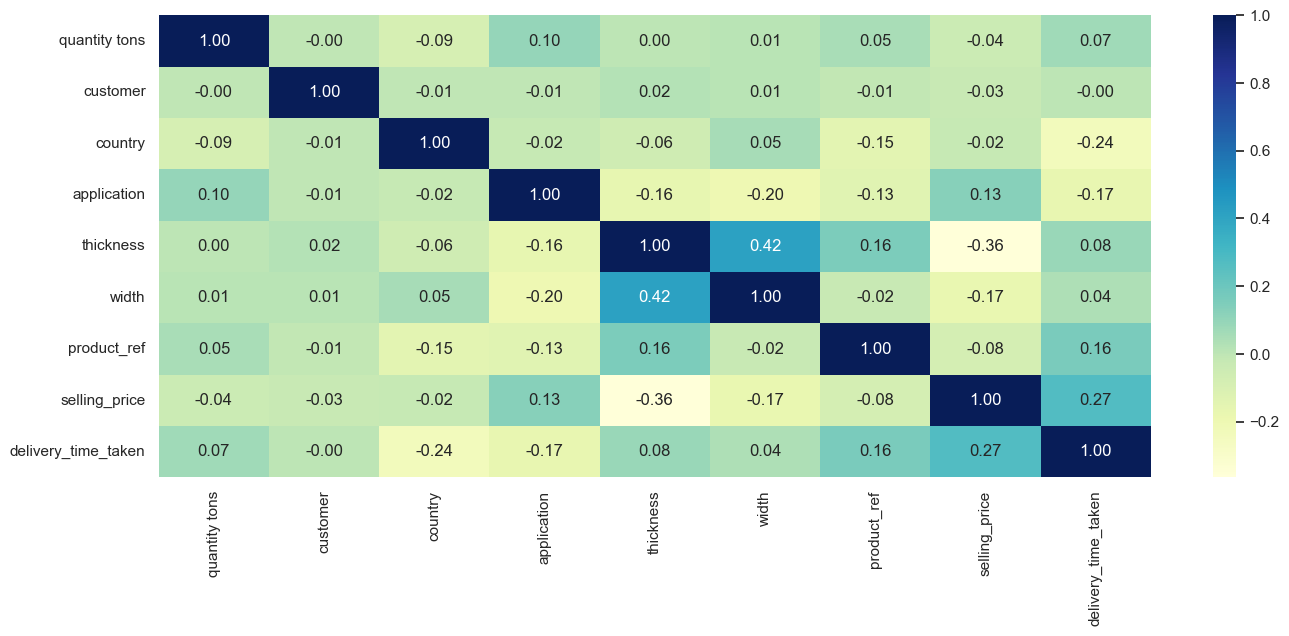

In [58]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="YlGnBu",fmt=".2f")


FINDING UNIQUE VALUE


In [59]:
model_data['country'] = model_data['country'].astype(str)
country=model_data['country'].unique()
status=model_data['status'].unique()
item=model_data['item type'].unique()
print(country)
print(status)
print(item)

['28' '25' '30' '32' '38' '78' '27' '77' '113' '79' '26' '39' '40' '84'
 '80' '107' '89']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


ENCODE THE CATEGORICAL COLUMN


country


In [60]:
from sklearn.preprocessing import OrdinalEncoder

encode=OrdinalEncoder()
model_data["country"] = encode.fit_transform(model_data[["country"]])
transformed_country=model_data["country"].unique()

transformed_country

array([ 5.,  2.,  6.,  7.,  8., 12.,  4., 11.,  1., 13.,  3.,  9., 10.,
       15., 14.,  0., 16.])

status


In [61]:
encode=OrdinalEncoder()
model_data['status'] = encode.fit_transform(model_data[['status']])
transformed_status=model_data['status'].unique()

transformed_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

item type


In [62]:
encode=OrdinalEncoder()
model_data["item type"] = encode.fit_transform(model_data[["item type"]])
transformed_item=model_data["item type"].unique()

transformed_item

array([5., 6., 3., 1., 2., 0., 4.])

In [63]:
model_data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,5.0,7.0,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447218,30202938.0,2.0,7.0,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447218,30153963.0,6.0,7.0,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,90


In [64]:
co=model_data.corr()
co

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
item_date,1.000000,-0.004156,-0.003787,-0.017783,0.080490,0.077165,-0.008461,0.004421,0.005961,0.045224,0.920100,0.556540,0.438586
quantity tons,-0.004156,1.000000,-0.001917,-0.088865,-0.055870,-0.244992,0.095520,0.002769,0.010398,0.051460,0.016080,-0.041819,0.067674
customer,-0.003787,-0.001917,1.000000,-0.002373,-0.020450,-0.010901,-0.006869,0.021806,0.009585,-0.007716,-0.002908,-0.026031,-0.001515
country,-0.017783,-0.088865,-0.002373,1.000000,0.086437,0.152530,-0.045988,-0.043297,0.051924,-0.146436,-0.093026,-0.038011,-0.223484
status,0.080490,-0.055870,-0.020450,0.086437,1.000000,0.242816,0.132770,-0.127196,-0.092672,-0.069760,-0.054796,0.122168,-0.260778
item type,0.077165,-0.244992,-0.010901,0.152530,0.242816,1.000000,0.169087,-0.076801,-0.092086,-0.089531,0.005812,0.096054,-0.142563
application,-0.008461,0.095520,-0.006869,-0.045988,0.132770,0.169087,1.000000,-0.163481,-0.198875,-0.131813,-0.078519,0.129890,-0.167831
thickness,0.004421,0.002769,0.021806,-0.043297,-0.127196,-0.076801,-0.163481,1.000000,0.419077,0.155758,0.042485,-0.363868,0.084554
width,0.005961,0.010398,0.009585,0.051924,-0.092672,-0.092086,-0.198875,0.419077,1.000000,-0.024106,0.026825,-0.173316,0.038787
product_ref,0.045224,0.051460,-0.007716,-0.146436,-0.069760,-0.089531,-0.131813,0.155758,-0.024106,1.000000,0.096174,-0.077811,0.161775


After encoding the Categorical data

In [65]:
for i, j in zip(status, transformed_status):
    print('After encoding :',i,'----- encoded :',j)

After encoding : Won ----- encoded : 7.0
After encoding : Draft ----- encoded : 0.0
After encoding : To be approved ----- encoded : 6.0
After encoding : Lost ----- encoded : 1.0
After encoding : Not lost for AM ----- encoded : 2.0
After encoding : Wonderful ----- encoded : 8.0
After encoding : Revised ----- encoded : 5.0
After encoding : Offered ----- encoded : 4.0
After encoding : Offerable ----- encoded : 3.0


In [66]:
for i,j in zip(item, transformed_item):
    print('After encoding :',i,'----- encoded :',j)

After encoding : W ----- encoded : 5.0
After encoding : WI ----- encoded : 6.0
After encoding : S ----- encoded : 3.0
After encoding : Others ----- encoded : 1.0
After encoding : PL ----- encoded : 2.0
After encoding : IPL ----- encoded : 0.0
After encoding : SLAWR ----- encoded : 4.0


In [67]:
for i,j in zip(country, transformed_country):
    print('After encoding :',i,'----- encoded :',j)

After encoding : 28 ----- encoded : 5.0
After encoding : 25 ----- encoded : 2.0
After encoding : 30 ----- encoded : 6.0
After encoding : 32 ----- encoded : 7.0
After encoding : 38 ----- encoded : 8.0
After encoding : 78 ----- encoded : 12.0
After encoding : 27 ----- encoded : 4.0
After encoding : 77 ----- encoded : 11.0
After encoding : 113 ----- encoded : 1.0
After encoding : 79 ----- encoded : 13.0
After encoding : 26 ----- encoded : 3.0
After encoding : 39 ----- encoded : 9.0
After encoding : 40 ----- encoded : 10.0
After encoding : 84 ----- encoded : 15.0
After encoding : 80 ----- encoded : 14.0
After encoding : 107 ----- encoded : 0.0
After encoding : 89 ----- encoded : 16.0


Pickle

In [68]:
import pickle

file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(transformed_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(transformed_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(transformed_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')

Pickle file created: country.pkl, status.pkl,item type.pkl


Load

In [69]:
import pickle
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

REGRESSION MODEL FOR FINDING SELLING PRICE

In [70]:
category_col=['status', 'item type','country']
encoder= OrdinalEncoder()
for i in category_col:
    print(i)
    model_data[i] = encoder.fit_transform(model_data[[i]])
    print(model_data[i].unique())

status
[7. 0. 6. 1. 2. 8. 5. 4. 3.]
item type
[5. 6. 3. 1. 2. 0. 4.]
country
[ 5.  2.  6.  7.  8. 12.  4. 11.  1. 13.  3.  9. 10. 15. 14.  0. 16.]


In [71]:
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,5.0,7.0,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447218,30202938.0,2.0,7.0,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447218,30153963.0,6.0,7.0,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.447218,30349574.0,7.0,7.0,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.447218,30211560.0,5.0,7.0,5.0,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [72]:
X = model_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = model_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
import pickle
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling.pkl


In [74]:
# Create an instance of each regression model
et_model = ExtraTreesRegressor()                   # Extra Tree Regressor
xgb_model = XGBRegressor()                         # Extreme Gradient Boost Regressor
dt_model = DecisionTreeRegressor()                 # Decision Tree Regressor

# Train the models
et_model.fit(X_train, y_train)
xgb_model.fit(X_train,y_train)
dt_model.fit(X_train, y_train)


# Make predictions on the test set
et_preds = et_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Evaluate the models

et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

In [75]:
print(f"ExtraTreeRegressor    MSE: {et_mse},  MAE: {et_mae},  R2: {et_r2}")
print(f"XGBRegressor          MSE: {xgb_mse},  MAE: {xgb_mae},  R2: {xgb_r2}")
print(f"DecisionTreeRegressor MSE: {dt_mse},  MAE: {dt_mae}, R2: {dt_r2}")

ExtraTreeRegressor    MSE: 4550.3930438899515,  MAE: 41.08744549280244,  R2: 0.897196805451673
XGBRegressor          MSE: 8008.114282214844,  MAE: 67.07302758563004,  R2: 0.8190794240015811
DecisionTreeRegressor MSE: 7904.607881332099,  MAE: 48.20268207186106, R2: 0.8214178568719535


In [76]:
models = ['ExtraTreeRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [et_r2, dt_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreeRegressor 0.897196805451673
DecisionTreeRegressor 0.8214178568719535
XGBRegressor 0.8190794240015811

Model: ExtraTreeRegressor contain Maximum R2_Score: 0.897196805451673 


In [77]:
model=et_model.fit(X_train, y_train)

In [78]:
import pickle

file_path7='ExtraTreeRegressor.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(model, file)
print(f'Pickle file created: {file_path7}')

Pickle file created: ExtraTreeRegressor.pkl


In [79]:
with open('ExtraTreeRegressor.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

ExtraTreesRegressor()

CLASSIFICATION MODEL FOR PREDICT THE STATUS WON/LOST


In [80]:
X = model_data[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','delivery_time_taken']].values
y = model_data[['status']].values

scaler_classify = StandardScaler().fit(X)
X = scaler_classify.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [81]:
import pickle

file_path8='scaling_classify.pkl'
with open(file_path8, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path8}')

Pickle file created: scaling_classify.pkl


In [82]:
# Create an instance of each regression model
rf_model = RandomForestClassifier()                # Random Forest Classifier
xgb_cls_model = xgb.XGBClassifier()                # Extreme Gradient Classifier
dtc_model=DecisionTreeClassifier()                 # Decision Tree Classifier

# Train the models
rf_model.fit(X_train, y_train)
xgb_cls_model.fit(X_train, y_train)
dtc_model.fit(X_train,y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
xgb_cls_preds = xgb_cls_model.predict(X_test)
dtc_preds = dtc_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_cls_accuracy = accuracy_score(y_test, xgb_cls_preds)
dtc_accuracy = accuracy_score(y_test, dtc_preds)

In [83]:
print(f"Random Forest Classifier Accuracy : {rf_accuracy}")
print(f"XGB Classifier Accuracy           : {xgb_cls_accuracy}")
print(f"Decision Tree Classifier Accuracy : {dtc_accuracy}")

Random Forest Classifier Accuracy : 0.9155580836345621
XGB Classifier Accuracy           : 0.835006146901778
Decision Tree Classifier Accuracy : 0.8809886419934311


In [84]:
models = ['RandomForestClassifier', 'XGBClassifier','DecisionTreeClassifier']
score = [rf_accuracy, xgb_cls_accuracy,dtc_accuracy]

fig=px.bar(x=models, y=score,title='Accuracy of Classification Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.9155580836345621
XGBClassifier 0.835006146901778
DecisionTreeClassifier 0.8809886419934311

Model: RandomForestClassifier contain Maximum accuracy: 0.9155580836345621 


In [85]:
model_cls=rf_model.fit(X_train, y_train)

In [86]:
file_path9='RandomForestClassification.pkl'
with open(file_path9, 'wb') as file:
    pickle.dump(model_cls, file)
print(f'Pickle file created: {file_path9}')

Pickle file created: RandomForestClassification.pkl


In [87]:
with open('RandomForestClassification.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

RandomForestClassifier()